# Práctica 2

Ahora es tu turno de construir un detector de objetos. 

## Ejercicio obligatorio (5 puntos)

A continuación se listan una serie de datasets que están disponibles en Kaggle o en otras fuentes. El ejercicio que tenéis que realizar obligatoriamente consiste en elegir uno de esos datasets (también podéis elegir otro que vosotros prefiráis) y construir un modelo siguiendo las instrucciones proporcionadas en el notebook de instrucciones. 

- [Kangaroo dataset](https://github.com/experiencor/kangaroo).
- [Racoon dataset](https://github.com/datitran/raccoon_dataset).
- [Wheat detection](https://www.kaggle.com/c/global-wheat-detection/data).
- [Winegrape Detection Dataset](https://github.com/thsant/wgisd). 

También puedes elegir cualquiera de los datasets disponibles en [50+ Object Detection Datasets from different industry domains](https://towardsai.net/p/computer-vision/50-object-detection-datasets-from-different-industry-domains) o utilizar un dataset de otra fuente. **Ojo.** Cuidado con el tamaño de los datasets, si contienen muchas imágenes el proceso de entrenamiento puede ser muy largo. 

## Ejercicios opcionales

A continuación se listan una serie de ejercicios adicionales. Para que estos ejercicios sean tenidos en cuenta han de ser documentadas en el propio notebook, dando una explicación de lo que se está haciendo. 

Es posible utilizar gran parte de la funcionalidad de FastAI que vimos para clasificadores de imágenes con la librería IceVision.
- *Busqueda learning rate* (0.5 puntos). Busca el learning rate más adecuado para entrenar tu modelo con el *learning rate finder*.
- *Callbacks* (0.5 puntos). Es posible utilizar los callbacks de FastAI. Utiliza dichos callbacks para aplicar *early stopping* y guardar el mejor modelo que se encuentre durante el proceso de entrenamiento. 

IceVision no solo permite entrenar modelos con la arquitectura de Faster RCNN sino también con otras muchas.
- *Entrena con otra arquitectura* (0.5 puntos). Entrena un modelo usando una arquitectura diferente a Faster RCNN.
- *Backbone* (0.5 puntos). En el ejemplo hemos visto cómo entrenar un modelo Faster RCNN con el backbone ResNet 18, entrena un nuevo modelo utilizando un backbone distinto. 
- *Ensemble* (1 punto). Una vez entrenados varios modelos crea un ensemble de los mismos para realizar predicciones. Para eliminar aquellos bounding boxes que se superpongan en la predicción usa la técnica de [Non maximum suppression](https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/).

Crea un space de HugginFace con el modelo que has creado (1 punto).

Además de la librería IceVision existen otras librerías para entrenar modelos con arquitecturas que no están incluidas en IceVision. Elige una de las siguientes librerías y entrena un modelo con ella (1 punto):
- [YOLO v3 o v4](https://github.com/AlexeyAB/darknet)
- [FCOS](https://github.com/xuannianz/keras-fcos)
- [FSAF](https://github.com/xuannianz/FSAF)
- [YOLO v5](https://github.com/ultralytics/yolov5)

También puedes elegir otra librería que busques por tu cuenta con algún algoritmo que no esté disponible en las librerías anteriores. 


Incluye a continuación tu código. Al finalizar, recuerda guardar los cambios en GitHub utilizando la opción Archivo -> Guardar una copia en GitHub.

In [3]:
!pip install icevision[all] -Uq

     |████████████████████████████████| 262 kB 5.2 MB/s 
     |████████████████████████████████| 98 kB 10.1 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:36tcmalloc: large alloc 1147494400 bytes == 0x3a3dc000 @  0x7eff1cd09615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.8 kB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 3.1 MB 41.2 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 
     |████████████████████████████████| 111 kB 45.2 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |████████████████████████████████| 58 kB 7.5 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████

In [1]:
from icevision.all import *

He descargado y subido a mano el Kangaroo dataset indicado arriba. Precedemos a hacer unzip y a trabajar con él. 

In [7]:
!unzip kangaroo-master

Archive:  kangaroo-master.zip
882bbbd75ba49cb8cf9393e06d88ebaec293af32
   creating: kangaroo-master/
  inflating: kangaroo-master/README.md  
   creating: kangaroo-master/annots/
  inflating: kangaroo-master/annots/00001.xml  
  inflating: kangaroo-master/annots/00002.xml  
  inflating: kangaroo-master/annots/00003.xml  
  inflating: kangaroo-master/annots/00004.xml  
  inflating: kangaroo-master/annots/00005.xml  
  inflating: kangaroo-master/annots/00006.xml  
  inflating: kangaroo-master/annots/00007.xml  
  inflating: kangaroo-master/annots/00009.xml  
  inflating: kangaroo-master/annots/00010.xml  
  inflating: kangaroo-master/annots/00011.xml  
  inflating: kangaroo-master/annots/00012.xml  
  inflating: kangaroo-master/annots/00013.xml  
  inflating: kangaroo-master/annots/00014.xml  
  inflating: kangaroo-master/annots/00016.xml  
  inflating: kangaroo-master/annots/00017.xml  
  inflating: kangaroo-master/annots/00018.xml  
  inflating: kangaroo-master/annots/00019.xml  
  inf

In [2]:
path=Path('kangaroo-master')
path.ls()

(#3) [Path('kangaroo-master/images'),Path('kangaroo-master/annots'),Path('kangaroo-master/README.md')]

# Ejercicio 1

## Parser

Utilizamos un Parser existente. Documentación de IceVision

In [3]:
parser = parsers.VOCBBoxParser(annotations_dir=path/"annots", images_dir=path/"images")

In [4]:
train_records, valid_records = parser.parse(RandomSplitter((0.9, 0.1)))
parser.class_map

  0%|          | 0/164 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/164 [00:00<?, ?it/s]

<ClassMap: {'background': 0, 'kangaroo': 1}>

In [5]:
classMap = parser.class_map

## Transform

In [6]:
presize = 512
size = 384
train_tfms = tfms.A.Adapter(
    [*tfms.A.aug_tfms(size=size, presize=presize), tfms.A.Normalize()]
)
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size), tfms.A.Normalize()])

## Dataset

In [7]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

## DataLoader

In [8]:
train_dl = models.torchvision.faster_rcnn.train_dl(train_ds, batch_size=8, num_workers=0, shuffle=True)
valid_dl = models.torchvision.faster_rcnn.valid_dl(valid_ds, batch_size=8, num_workers=0, shuffle=False)

## Entrenando el modelo

In [9]:
model = models.torchvision.faster_rcnn.model(backbone=models.torchvision.faster_rcnn.backbones.resnet18_fpn(pretrained=True),
                                       num_classes=len(classMap))

In [10]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [15]:
learn = models.torchvision.faster_rcnn.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [19]:
learn.fine_tune(10,freeze_epochs=2)

epoch,train_loss,valid_loss,COCOMetric,time
0,0.926546,0.899203,0.071831,00:14
1,0.968162,1.028647,0.043488,00:10


epoch,train_loss,valid_loss,COCOMetric,time
0,0.522601,0.265249,0.148513,00:16
1,0.385708,0.302190,0.220485,00:14
2,0.351193,0.292928,0.232935,00:14
3,0.324539,0.315885,0.146278,00:16
4,0.311159,0.248412,0.304376,00:16
5,0.287488,0.251713,0.307259,00:13
6,0.267558,0.246126,0.397881,00:14
7,0.255458,0.242593,0.427974,00:14
8,0.247702,0.240668,0.421644,00:15
9,0.240171,0.237001,0.427252,00:15


In [20]:
torch.save(model.state_dict(),'fasterRCNNKangaroos.pth')

## Evaluando el modelo

In [21]:
newdl = fastai.DataLoaders(models.torchvision.faster_rcnn.fastai.convert_dataloader_to_fastai(train_dl),
                           models.torchvision.faster_rcnn.fastai.convert_dataloader_to_fastai(valid_dl)).to('cuda')

learn.dls = newdl

learn.validate()

(#2) [0.2360871583223343,0.4272524112194457]

## Inferencia

In [23]:
model = models.torchvision.faster_rcnn.model(backbone=models.torchvision.faster_rcnn.backbones.resnet18_fpn,
                                             num_classes=len(classMap))
state_dict = torch.load('fasterRCNNKangaroos.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [24]:
import PIL

In [25]:
img = PIL.Image.open('kangaroo-master/images/00001.jpg')

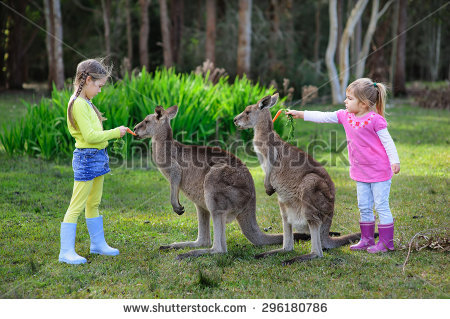

In [26]:
img

In [27]:
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size),tfms.A.Normalize()])

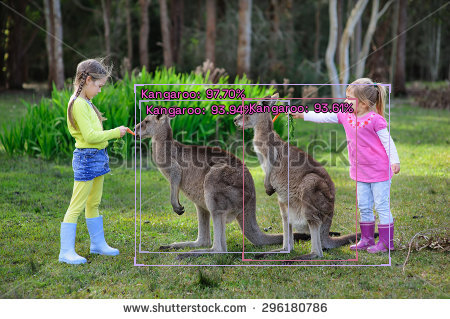

In [28]:
pred_dict  = models.torchvision.faster_rcnn.end2end_detect(img, infer_tfms, model.to("cpu"), class_map=classMap, detection_threshold=0.5)
pred_dict['img']